# 1. Formalism

According to KZ16, when the companion is on a circular orbit with pattern frequency $\sigma = 2(\Omega - \Omega_s)$ (where $\Omega_s$ is the spin frequency of the stellar core and $\Omega$ is the orbital frequency), the torque is given
$$
    \tau = \beta_2\frac{GM_2^2r_c^5}{a^6}
        \mathrm{sgn}(\sigma)\left|\frac{\sigma}{\sqrt{GM_c/r_c^3}}\right|^{8/3}
            \frac{\rho_c}{\bar{\rho}_c} \left(1 - \frac{\rho_c}{\bar{\rho}_c}\right)^2.
$$
where $\beta_2 \approx 1$ for most stars, and $r_c$ is the core radius.

VLF17 furthermore give the total torque for an eccentric mode
$$
\tau = \sum_{N = -\infty}^{\infty} F_{N2}^2 \tau_N
$$
where the $F_{N2}$ are Hansen coefficients, and the $\tau_N$ are the contributions from each harmonic $N$. If we let $\sigma = N\Omega - 2\Omega_s$ in the KZ16 torque, then we can rewrite the torque exerted by each harmonic as
$$
    \tau_N(r_c) = \hat{\tau}(r_c) \mathrm{sgn}\left(N - 2\Omega_s / \Omega\right) \left|N - 2 \Omega_s / \Omega\right|^{8/3}
$$
where
$$
    \hat{\tau}(r_c) = \beta_2\frac{GM_2^2r_c^5}{a^6}
        \left(\frac{\Omega}{\sqrt{GM_c/r_c^3}}\right)^{8/3}
            \frac{\rho_c}{\bar{\rho}_c} \left(1 - \frac{\rho_c}{\bar{\rho}_c}\right)^2.
$$
This implies we can write
$$
\tau = \hat{\tau}(r_c) \sum_{N = -\infty}^{\infty} F_{N2}^2 \mathrm{sgn}\left(N - 2\Omega_s / \Omega\right) \left|N - 2 \Omega_s / \Omega\right|^{8/3}
$$

The energy term is similar:
$$
\dot{E}_{\rm in} = \frac{\hat{\tau}(r_c, \Omega)}{2} \sum_{N = -\infty}^{\infty} \left[
    N\Omega F_{N2}^2 \mathrm{sgn}\left(N - 2\Omega_s / \Omega\right) \left|N - 2 \Omega_s / \Omega\right|^{8/3} + \left(\frac{W_{20}}{W_{22}}\right)^2 \Omega F_{N0}^2 |N|^{11/3}\right]
$$
and
$$
\dot{E}_{\rm rot} = \dot{E}_{\rm in} - \Omega_s \tau
$$

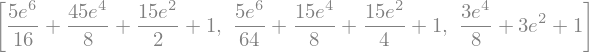

In [2]:
import sympy as sp
import numpy as np
from scipy.special import gamma
from IPython.display import display
sp.init_printing(use_latex=True)

N, e = sp.symbols('N e ', positive=True)
f2, f3, f5, j = sp.symbols('f_2 f_3 f_5 j', positive=True)
ecc_subdict = {
    f2: 1 + e**2 * sp.Rational(15, 2) + e**4 * sp.Rational(45, 8) + e**6 * sp.Rational(5, 16),
    f3: 1 + e**2 * sp.Rational(15, 4) + e**4 * sp.Rational(15, 8) + e**6 * sp.Rational(5, 64),
    f5: 1 + e**2 * 3 + e**4 * sp.Rational(3, 8)
}
jsub = { j: sp.sqrt(1 - e**2) }
def my_display(expr, other_subs={}):
    all_subs = {**jsub, **other_subs}
    if type(expr) == list:
        expr = [e.subs(all_subs) for e in expr]
    else:
        expr = expr.subs(all_subs)
    display(expr)
display([f2, f3, f5])
my_display([f2, f3, f5], ecc_subdict)

C2, eta2 = sp.symbols(r'C_2 \eta_2', positive=True)
p = 2 # ansatz
C0, eta0 = sp.symbols(r'C_0 \eta_0', positive=True)

F_N2 = C2 * N**p * sp.E**(-N / eta2)
F_N0 = C0 * sp.E**(-N / eta0)
def get_fn2_integral(p):
    return sp.Integral(F_N2**2 * N**p, (N, 0, sp.oo))
def get_fn0_integral(p):
    return sp.Integral(2 * F_N0**2 * N**p, (N, 0, sp.oo))

# 2. Fitting Formulas

## a. F_N2

First, we aim to calculate the fitting formulas for the two sets of Hansen coefficients, $F_{N0}$ and $F_{N2}$. Below we first do so for $F_{N2}$. The constraints are
\begin{align}
    \sum_{N = -\infty}^{\infty} F_{N2}^2 = \frac{f_5}{(1 - e^2)^{9/2}},\\
    \sum_{N = -\infty}^{\infty} F_{N2}^2N = \frac{2f_2}{(1 - e^2)^{6}}.
\end{align}
These are analytic. We approximate
$$
F_{N2} =
\begin{cases}
0 & N \leq 0\\
C_2 N^p e^{-N/\eta_2} & N > 0.
\end{cases}
$$
We take universal $p = 2$ based on numerical comparison. We then fit for $C_2, \eta_2$ by setting both of the below equal to zero:

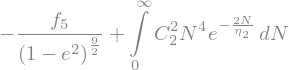

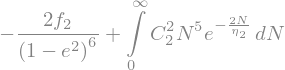

In [3]:
fn2_moment0 = get_fn2_integral(0) - f5 / j**9
fn2_moment1 = get_fn2_integral(1)  - 2 * f2 / j**12
my_display(fn2_moment0)
my_display(fn2_moment1)

Setting both of the above equal to zero gives solution for $\eta_2, C_2$:

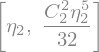

=


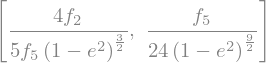

In [4]:
[[c2sol, eta2sol]] = sp.solve([
    fn2_moment0.doit(),
    fn2_moment1.doit(),
], [C2, eta2])
sol2subs = { C2: c2sol, eta2: eta2sol }
my_display([eta2, C2**2 * (eta2 / 2)**5])
print('=')
my_display([sp.simplify(eta2sol), sp.simplify(c2sol**2 * (eta2sol / 2)**5)])

Note that the $N$ for which $F_{N2}^2$ peaks is just $p\eta_2 = 2\eta_2$. Naively, we expect this to scale with the pericenter harmonic $N_{\rm peri} = \sqrt{1 + e}{(1 - e^2)^{3/2}}$. For $e \to 1$, the fitted formula peaks at $N = 132/25 (1 - e^2)^{-3/2}$, which is the right scaling.

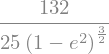

In [5]:
nmax = eta2sol.subs(ecc_subdict).subs(e, 1)
my_display(sp.simplify(2 * nmax))

## b. F_N0

Next, we fit $F_{N0}$. The constraints are
\begin{align}
    \sum_{N = -\infty}^\infty F_{N0}^2 &= \frac{f_5}{(1 - e^2)^{9/2}},\\
    \sum_{N = -\infty}^\infty F_{N0}^2 N^2 &= \frac{9e^2f_3}{2(1 - e^2)^{15/2}}.
\end{align}
We pick fitting formula
$$
F_{N0} = C_0 e^{-|N| / \eta_0}.
$$
This produces fit

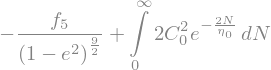

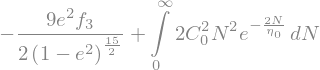

=


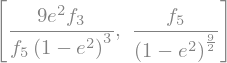

In [6]:
fn0_moment0 = get_fn0_integral(0) - f5 / j**9
fn0_moment2 = get_fn0_integral(2) - sp.Rational(9, 2) * e**2 / j**15 * f3
my_display(fn0_moment0)
my_display(fn0_moment2)
[[c0sol, eta0sol]] = sp.solve([
    fn0_moment0.doit(),
    fn0_moment2.doit(),
], [C0, eta0])
sol0subs = { C0: c0sol, eta0: eta0sol }
my_display([eta0**2, C0**2 * eta0])
print('=')
my_display([sp.simplify(eta0sol**2), sp.simplify(c0sol**2 * eta0sol)])

# 3. Results

## a. Torque

Now, we evaluate the torque,
\begin{align}
    \tau &= \hat{\tau} \sum\limits_{N = -\infty}^{\infty} F_{N2}^2
        \mathrm{sgn}\left(N - 2\Omega_s / \Omega\right) \left|N - 2 \Omega_s / \Omega\right|^{8/3},\\
    &= \hat{\tau} \int_0^\infty C_2^2 N^4 e^{-2N / \eta_2}
        \mathrm{sgn}\left(N - 2\Omega_s / \Omega\right) \left|N - 2 \Omega_s / \Omega\right|^{8/3}\;\mathrm{d}N.
\end{align}
Call $N_{\max}$ the $N$ for which the summand is maximized (we will determine this a posterori); note $N_{\max} > 0$. First, we will approximate $|\Omega_s / \Omega| \gg N_{\max}$, then we will show that the accuracy of the prediction can be improved via yet another ansatz

### Case 1: Asymptotic

First, consider $N_{\max} \ll |2\Omega_s / \Omega|$. The sign is just $-\mathrm{sgn}(\Omega_s)$, and the rest simplifies easily
\begin{align}
    \tau &= -\hat{\tau} \;\mathrm{sgn}(\Omega_s)\;\left|2 \Omega_s / \Omega\right|^{8/3}
        \sum\limits_{N = -\infty}^{N = \infty} F_{N2}^2\\
        &= -\hat{\tau} \;\mathrm{sgn}(\Omega_s)\;\left|2 \Omega_s / \Omega\right|^{8/3} \frac{f_5}{(1 - e^2)^{9/2}}
\end{align}

### Case 2: Approaching Pseudosynchronization

In the limit where $N_{\max} \simeq 2\Omega_s / \Omega$, the largest terms in the summation have opposite signs, and we must be more careful. We make ansatz for unknown $\alpha$
$$
N - 2\Omega_s / \Omega \simeq \frac{N}{N_{\max}} \left(N_{\max} - \frac{2\alpha \Omega_s}{\Omega}\right),
$$
which gives torque (see below)
\begin{align}
    \tau &= \hat{\tau} \; \mathrm{sgn} \left(N_{\max} - \frac{2\alpha \Omega_s}{\Omega}\right)
                \left|N_{\max} - \frac{2\alpha \Omega_s}{\Omega}\right|^{8/3}
                \sum_{N = -\infty}^{\infty} F_{N2}^2\left(\frac{N}{N_{\max}}\right)^{8/3},\\
        &= \hat{\tau} \; \mathrm{sgn} \left(\frac{10}{3}\eta_2 - \frac{2\alpha \Omega_s}{\Omega}\right)
                \left|\frac{10}{3}\eta_2 - \frac{2\alpha \Omega_s}{\Omega}\right|^{8/3}
                \frac{1}{4!}\frac{\Gamma(23/3)}{(20/3)^{8/3}}\frac{f_5}{(1 - e^2)^{9/2}},\\
        &= \hat{\tau} \; \mathrm{sgn} \left(1 - \frac{3}{5\eta_2}\frac{\alpha \Omega_s}{\Omega}\right)
            \left|1 - \frac{3}{5\eta_2}\frac{\alpha \Omega_s}{\Omega}\right|^{8/3}
            \frac{\Gamma(23/3)}{4!}\left(\frac{\eta_2}{2}\right)^{8/3}\frac{f_5}{(1 - e^2)^{9/2}}.
\end{align}
We have gone ahead and used $N_{\max} = (2 + 4/3)\eta_2$, since the summand $\propto N^{4 + 8/3}e^{-2N / \eta_2}$. The integral can be checked below:

Integral is:


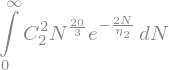

Integral * 4! / Gamma(23/3) / (eta2 * 10 / 3)**(8/3) * (20/3)**(8/3) =


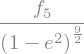

In [7]:
t_case2_intexpr = get_fn2_integral(sp.Rational(8, 3))
print('Integral is:')
my_display(t_case2_intexpr)
t_case2 = t_case2_intexpr.subs(sol2subs).doit()
t_case2simpdiv = sp.simplify(
    t_case2 * 24 / sp.gamma(sp.Rational(23, 3)) / (eta2sol * sp.Rational(10, 3))**(sp.Rational(8, 3))
    * (sp.Rational(20, 3))**sp.Rational(8, 3))
print('Integral * 4! / Gamma(23/3) / (eta2 * 10 / 3)**(8/3) * (20/3)**(8/3) =')
my_display(t_case2simpdiv)

$\alpha$ is fixed by requiring $\tau(|\Omega_s| \to \infty)$ have the correct asymptotic behavior. This then requires
\begin{align}
    1 &= \left(\frac{3\alpha}{20}\right)^{8/3} \frac{\Gamma(23/3)}{4!},\\
    \frac{3\alpha}{5} &= 4\left(\frac{4!}{\Gamma(23/3)}\right)^{3/8} \approx 0.691.
\end{align}

In [8]:
(gamma(5) / gamma(23/3))**(3/8) * 4

Thus, we arrive at final answer
$$
    \tau = \hat{\tau} \frac{f_5 \eta_2^{8/3}}{(1 - e^2)^{9/2}}
        \;\mathrm{sgn}\left(1 - 0.691\frac{\Omega_s}{\eta_2\Omega}\right)
            \left|1 - 0.691\frac{\Omega_s}{\eta_2\Omega}\right|^{8/3} \frac{\Gamma(23/3)}{4!} \frac{1}{2^{8/3}}.
$$
This gives a very clear prediction for the pseudosynchronization frequency, i.e. $\tau(\Omega_s = \eta_2 \Omega / 0.691) = 0$. This matches the pseudosynchronization frequency calculated using the full integral approximation.

## b. Energy

We can also write down the integral approximation for the energy dissipation
\begin{align}
    \dot{E}_{\rm in} &= \frac{\hat{\tau}(r_c, \Omega)}{2} \sum_{N = -\infty}^{\infty} \left[
        N\Omega F_{N2}^2 \mathrm{sgn}\left(N - 2\Omega_s / \Omega\right) \left|N - 2 \Omega_s / \Omega\right|^{8/3}
            + \left(\frac{W_{20}}{W_{22}}\right)^2 \Omega F_{N0}^2 |N|^{11/3}
        \right]\\
        &= \frac{\hat{\tau}(r_c, \Omega) \Omega}{2} \int_0^\infty \left[
            C_2^2 N^5 e^{-2N/\eta_2} \mathrm{sgn}\left(N - 2\Omega_s / \Omega\right) \left|N - 2 \Omega_s / \Omega\right|^{8/3}
            + 2 \frac{2}{3} C_0^2 e^{-2N / \eta_0} N^{11/3}
        \right]\;\mathrm{d}N
\end{align}

### Term 1: m=2 Term

We first consider the first term in the integral, which is handled very similarly to the above. The high spin limit is just
$$
\dot{E}_{\rm in}^{(m=2)} =
    -\frac{\hat{\tau}\Omega}{2} \; \mathrm{sgn}(\Omega_s)|2\Omega_s/\Omega|^{8/3}
        \frac{2f_2}{(1 - e^2)^6}
$$

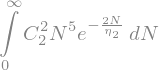

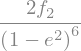

In [9]:
e_case1base = get_fn2_integral(1)
my_display(e_case1base)
my_display(e_case1base.doit().subs(sol2subs))

Making the same ansatz as above, we end up with

Integral is:


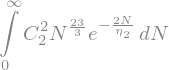

Integral * 4! / Gamma(26/3) / (eta2 * 13 / 3)**(11/3) * (26/3)**(11/3) =


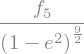

In [10]:
e_case1_intexpr = get_fn2_integral(sp.Rational(11, 3))
print('Integral is:')
my_display(e_case1_intexpr)
e_case1 = e_case1_intexpr.subs(sol2subs).doit()
e_case1simpdiv = sp.simplify(
    e_case1 * 24 / sp.gamma(sp.Rational(26, 3)) / (eta2sol * sp.Rational(13, 3))**(sp.Rational(11, 3))
    * (sp.Rational(26, 3))**sp.Rational(11, 3))
print('Integral * 4! / Gamma(26/3) / (eta2 * 13 / 3)**(11/3) * (26/3)**(11/3) =')
my_display(e_case1simpdiv)

Noting that now $N_{\rm max} \simeq \frac{5 + 8/3}{2} \eta_2$, our constraint becomes
\begin{align}
    \lim_{|\Omega_s| \to \infty} \left|1 - \frac{2\alpha \Omega_s}{N_{\max}\Omega}\right|^{8/3} \frac{f_5}{(1 - e^2)^{9/2}}
        \frac{\Gamma(26/3)}{4!} \left(\frac{\eta_2}{2}\right)^{11/3} &=
    |2\Omega_s/\Omega|^{8/3}
        \frac{2f_2}{(1 - e^2)^6},\\
    \left(\frac{6\alpha}{23\eta_2}\right)^{8/3}\frac{\Gamma(26/3)}{4!} \left(\frac{\eta_2}{2}\right)^{11/3}
        \frac{f_5(1 - e^2)^{3/2}}{2f_2} &= 1,\\
    \frac{12\alpha}{23} &= \left(\frac{5! 2^{16/3}}{\Gamma(26/3)}\right)^{3/8} \approx 0.5886
\end{align}
and so
$$
\dot{E}_{\rm in}^{(m=2)}
    = -\frac{\hat{\tau}\Omega}{2}\;\mathrm{sgn}(\Omega_s)\;\left|1 - 0.5886\frac{\Omega_s}{\eta_2 \Omega}\right|^{8/3}
        \frac{f_5}{(1 - e^2)^{9/2}}
        \frac{\Gamma(26/3)}{4!} \left(\frac{\eta_2}{2}\right)^{11/3}
$$

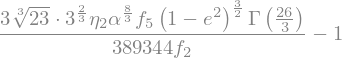

0.588591506083493
0.5885915060834931


In [11]:
alpha = sp.symbols('alpha', positive=True)
expr = (
    (sp.Rational(6, 23) * alpha / eta2)**(sp.Rational(8, 3)) * sp.gamma(sp.Rational(26, 3))
            / sp.gamma(5) * (eta2 / 2)**(sp.Rational(11, 3))
        * f5 * j**3 / (2 * f2)) - 1
my_display(expr)
[root] = sp.solve(expr.subs(eta2, eta2sol), alpha)
print(12 * root.evalf() / 23)
print((gamma(5) * 2**(16/3) * 5 / gamma(26/3))**(3/8))

### Term 2: m=0 Sum

This integral is trivial to evaluate with our fitting formulas above:
\begin{align}
    \dot{E}_{\rm in}^{(m=0)} &= \frac{\hat{\tau}(r_c, \Omega) \Omega}{2} \int_0^\infty \left[\frac{4}{3} C_0^2 e^{-2N / \eta_0} N^{11/3}
        \right]\;\mathrm{d}N,\\
        &= \frac{\hat{\tau}\Omega}{2} \frac{f_5 \Gamma(14 / 3)}{(1 - e^2)^{10}} \left(\frac{3}{2}\right)^{8/3}
            \left(\frac{e^2 f_3}{f_5}\right)^{11/6}
\end{align}

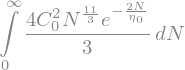

In [12]:
# guess is above, simplify is too messy
m0intexpr = sp.Integral(sp.Rational(4, 3) * C0**2 * sp.E**(-2 * N / eta0) * N**(sp.Rational(11, 3)), (N, 0, sp.oo))
my_display(m0intexpr)
res = m0intexpr.doit().subs(sol0subs)
guess = sp.simplify(
    f5 * sp.gamma(sp.Rational(14, 3)) / j**20 * (
        e**2 * f3 / f5)**(sp.Rational(11, 6))) * (sp.Rational(3, 2))**(sp.Rational(8, 3))
display(res / guess)

### Final edot

Putting it all together, we obtain
$$
\dot{E}_{\rm in} = \frac{\hat{\tau}\Omega}{2}\left[
    \;\mathrm{sgn}\left(1 - 0.5886\frac{\Omega_s}{\eta_2 \Omega}\right)\;\left|1 - 0.5886\frac{\Omega_s}{\eta_2 \Omega}\right|^{8/3}
        \frac{f_5}{(1 - e^2)^{9/2}}
        \frac{\Gamma(26/3)}{4!} \left(\frac{\eta_2}{2}\right)^{11/3} + 
    \frac{f_5 \Gamma(14 / 3)}{(1 - e^2)^{10}} \left(\frac{3}{2}\right)^{8/3}
            \left(\frac{e^2 f_3}{f_5}\right)^{11/6}\right]
$$

# J0045-7319

While the expression for $\dot{E}_{\rm in}$ is rather complex, it is well separated. Denote the entire bracketed term $g(e, \Omega_s / \Omega)$, then
$$
\dot{E}_{\rm in} = \hat{\tau}\Omega g\left(e, \frac{\Omega_s}{\Omega}\right).
$$

If $\dot{P} / P$ is measured for a system, we can write the change in gravitational binding energy
\begin{align}
    \dot{E}_g &= \frac{GM_1M_2}{2a}\frac{\dot{a}}{a} = \frac{GqM_2^2}{3a}\frac{\dot{P}}{P},\\
    \dot{E}_{\rm in} = \hat{\tau}\Omega \; g\left(e, \frac{\Omega_s}{\Omega}\right) &= -\dot{E}_g
\end{align}

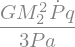

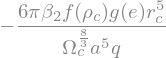

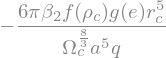

In [13]:
Eg, G, M, q, a, P, rhoterm, g, beta2, spin, rc, Wc = sp.symbols(r'Eg G M_2 q a P f(\rho_{c}) g beta_2 \omega r_c \Omega_{c}')
adot, Pdot, g = sp.symbols(r'\dot{a} \dot{P} g(e)')
Eg = -G * q * M**2 / (2 * a)
dEg_dt = sp.Derivative(Eg, a).doit() * adot
# P^2 \propto a^3, so 2\dot{P} / P = 3\dot{a} / a, adot = 2 * Pdot * a / 3 * P
dEg_dt_pdot = dEg_dt.subs(adot, (2 * Pdot * a) / (3 * P))
display(dEg_dt_pdot)

tau = beta2 * G * M**2 * rc**5 / a**6 * Wc**(-sp.Rational(8, 3)) * rhoterm
dEin_dt = tau * g
[res] = sp.solve(dEg_dt_pdot + dEin_dt, Pdot)
display(res.subs(P, 2 * sp.pi))
display(
    -6 * sp.pi / q
        * beta2 * (rc / a)**5
        * Wc**(-sp.Rational(8, 3))
        * rhoterm * g
)

Substituting in $\hat{\tau}$, we obtain ($q = M_1 / M_2$, and $\Omega_{s, c} = \sqrt{GM_c/r_c^3}$)
\begin{align}
    -\dot{P} &= \frac{6\pi}{q}\beta_2\left(\frac{r_c}{a}\right)^5
        \left(\frac{\Omega}{\Omega_{s, c}}\right)^{8/3}
            \frac{\rho_c}{\bar{\rho}_c} \left(1 - \frac{\rho_c}{\bar{\rho}_c}\right)^2 g\left(e, \frac{\Omega_s}{\Omega}\right).
\end{align}

Note that $g$ increases for faster spins, but $|\Omega_s| \lesssim \sqrt{GM_c / r_c^3}$, the breakup spin frequency. Otherwise, taking $\beta_2 \approx 1$, the only unconstrained quantities are $\rho_c$, $\bar{\rho}_c$, and $r_c$. Generally, the density terms seem constant for a range of stellar models we simulated using MESA. Thus, if we assume $\dot{P} / P$ solely comes from dissipation of the dynamical tide, that the $m = 2$ components dominate the $m = 0$ contribution (i.e. the critical rotation rate is fast), and that all harmonics are dissipated completely in the envelope, we arrive at constraint for $r_c$:
\begin{align}
    \left|g\left(e, \frac{\Omega_s}{\Omega}\right)\right| &\lesssim \frac{1}{2}|2\Omega_{s,c}/\Omega|^{8/3}\frac{2f_2}{(1 - e^2)^6},\\
    -\dot{P} &\lesssim \frac{6\pi}{q}\beta_2 \left(\frac{r_c}{a}\right)^5
        \frac{\rho_c}{\bar{\rho}_c} \left(1 - \frac{\rho_c}{\bar{\rho}_c}\right)^2
        2^{8/3}\frac{f_2}{(1 - e^2)^6}.
\end{align}
If we take $\rho_c / \bar{\rho}_c \approx 0.76$, which is what we see in our MESA models, the rest of the parameters can be explicitly evaluated:

In [15]:
pdot = 3.03e-7
rho_c_over_bar_rho_c = 1/3
e_val = 0.808
f5_val = f5.subs(ecc_subdict).subs(e, e_val).evalf()
f2_val = f2.subs(ecc_subdict).subs(e, e_val).evalf()
eta2_val = eta2sol.subs(ecc_subdict).subs(jsub).subs(e, e_val).evalf()
q = 6.3
a = 126 # solar radii

rho_c_over_bar_rho_c = 1/3
rc_min1 = (
    pdot / (2 * np.pi)
    / (
        3 / q
        * (rho_c_over_bar_rho_c * (1 - rho_c_over_bar_rho_c)**2)
        * 2**(8/3) * f2_val / (1 - e_val**2)**6
    )
)**(1/5)
print(rho_c_over_bar_rho_c, rc_min1 * a)

rho_c_over_bar_rho_c = 0.76
rc_min1 = (
    pdot / (2 * np.pi)
    / (
        3 / q
        * (rho_c_over_bar_rho_c * (1 - rho_c_over_bar_rho_c)**2)
        * 2**(8/3) * f2_val / (1 - e_val**2)**6
    )
)**(1/5)
print(rho_c_over_bar_rho_c, rc_min1 * a)

0.3333333333333333 0.934800393987056
0.76 1.19291889361346


### For literature values

We use $r_c = 0.23 R = 1.38 R_{\odot}$, the same $\rho_c / \bar{\rho}_c = 0.76$ as before (I think that this isn't very accurate, since my $\rho_c \sim 9$ while theirs $\sim 2$). Furthermore, we calculate the breakup frequency in units of the orbital frequency
\begin{equation}
    \frac{\Omega_{s, c}}{\Omega} = \frac{(51.17\;\mathrm{days}) \Omega_{s, c}}{2\pi} = 472
\end{equation}
Also of use is the characteristic scale (evaluated for the original params, $M_2 = 1.4M_{\odot}$)
[here](http://www.wolframalpha.com/input/?i=G+*+%281.4+solar+mass%29%5E2+*+%281.38+solar+radius%29%5E5+%2F+%28126+solar+radius%29%5E6+*+%281+%2F+472%29%5E%288%2F3%29+*+0.76+*+%281+-+0.76%29%5E2+*+%282pi+%2F+%2851.17+days%29%29)
\begin{equation}
    \hat{\tau}\Omega \approx 4.28 \times 10^{15} \;\mathrm{W} = 1.113 \times 10^{-11} L_{\odot}
\end{equation}

Evaluating for the orbital parameters of J0045-7319 (excepting the spin) and taking $\beta_2 \approx 1$, we obtain [here](https://www.wolframalpha.com/input/?i=6+*+pi+%2F+6.3+*+%281.38%2F126%29%5E5+*+%281+%2F+472%29%5E%288%2F3%29+*+0.76+*+%281+-+0.76%29%5E2) (assuming the density ratio is $0.76$)
\begin{equation}
    -\dot{P} = 1.52 \times 10^{-18} \left(\frac{r_c}{1.38 R_{\odot}}\right)^5 g\left(e, \frac{\Omega_s}{\Omega}\right)
\end{equation}

For these parameters, we get that $\Omega_s / \Omega_{s, c}\approx -0.84$, so rapid retrograde rotation. We can also compute the tidal luminosity in the co-rotating frame, which comes out to $\dot{E}_{\rm rot} \approx 96 L_{\odot}$, small compared to the luminosity of the star.